In [1]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical computing
import numpy as np

# Import seaborn for data visualization
import seaborn as sns

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import WordCloud and STOPWORDS for generating word clouds
from wordcloud import WordCloud, STOPWORDS

# Import PorterStemmer and WordNetLemmatizer for text preprocessing tasks such as stemming and lemmatization
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Import re and warnings for data preprocessing tasks such as text cleaning and removing stopwords
import re
import warnings

# Import string for data preprocessing tasks such as text cleaning
import string

# Import nltk for natural language processing tasks
import nltk

# Import stopwords from nltk.corpus for removing stopwords from text data
from nltk.corpus import stopwords

# Import keras from tensorflow for building and training neural networks
from tensorflow import keras

# Import gensim.models for topic modeling and natural language processing tasks
import gensim.models

# Import LabelEncoder and LabelBinarizer from sklearn for encoding categorical variables
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

# Import tensorflow for building and training neural networks
import tensorflow as tf

# Import initializers and preprocessing from tensorflow.keras for neural network preprocessing tasks such as feature scaling and data normalization
from tensorflow.keras import initializers, preprocessing

# Import hub from tensorflow_hub for transfer learning with pre-trained models
#import tensorflow_hub as hub

# Import Xception from tensorflow.keras.applications for transfer learning with pre-trained models
from tensorflow.keras.applications.xception import Xception

# Import image from tensorflow.keras.preprocessing for image preprocessing and classification tasks
from tensorflow.keras.preprocessing import image

# Import preprocess_input and decode_predictions from tensorflow.keras.applications.resnet50 for image preprocessing and classification tasks
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Import numpy for numerical computing
import numpy as np

# Import confusion_matrix, plot_confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score, roc_auc_score from sklearn.metrics for evaluating classification models and generating performance metrics
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score, roc_auc_score

# Import train_test_split from sklearn.model_selection for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import roc_curve, plot_roc_curve from sklearn.metrics for evaluating classification models and generating performance metrics
from sklearn.metrics import roc_curve

# Import Tokenizer and pad_sequences from tensorflow.keras.preprocessing.text for text preprocessing tasks such as tokenization and padding sequences for neural networks
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
#Importing required libraries
import pickle
import nltk
import pandas as pd
import tensorflow

#Preprocessing Dependencies
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import  Counter

#Model Dependencies
from sklearn .metrics import classification_report,confusion_matrix,accuracy_score


from sklearn.model_selection import train_test_split





#Plot Dependencies
import matplotlib.pyplot as plt
import wordcloud

### Load  Dataset

In [6]:
df = pd.read_csv('data/Twitter_Data.csv')


In [7]:
df.head(10)

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
5           kiya tho refresh maarkefir comment karo        0.0
6  surat women perform yagna seeks divine grace f...       0.0
7  this comes from cabinet which has scholars lik...       0.0
8  with upcoming election india saga going import...       1.0
9                         gandhi was gay does modi         1.0

###   EXPLARATORY DATA ANALYSIS   (EDA)

- EDA  is a process whereby we do  initial investigations on our data , spo that we have to make sense of our data,this allows us to discover hidden patterns within the data, spot anomalies and test hypothesis

### Merge the two Data sets 

In [8]:
#Renaming Column  in twitter dataser

df.rename(columns = {'clean_text':'clean_comment'}, inplace = True)

In [9]:
df.head()

clean_comment  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [10]:
#Shape Of   twitter Data
df.shape

(162980, 2)

### Visualization

In [11]:
import cufflinks as cf
import plotly as pl

In [12]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df['category'].iplot(
    kind='hist',
    xTitle='Categories',
    linecolor='black',
    yTitle='count',
    title='Category Distribution')

##### EXPLAINING THE VALUES FOR THE CATEGORIES    

The category column has 3 values:

1.   0  Indicating it is a Neutral Sentiment
2.   1  Indicating a Postive Sentiment
3.  -1  Indicating a Negative Sentiment

In [15]:
# check NaN values
print(df.isna().sum())

clean_comment    0
category         0
dtype: int64


In [16]:
# drop NaN values
df = df.dropna()

### String Length Distribution

In [17]:
pd.DataFrame(df['clean_comment'].str.len())['clean_comment'].iplot(
    kind='hist',
    bins=70,
    xTitle='String length',
    linecolor='black',
    yTitle='count',
    title='String Length Distribution')

In [18]:
#Word Count Distribution
df['word_count'] = df['clean_comment'].str.split().str.len()
df['word_count'].iplot(
    kind='hist',
    bins=70,
    xTitle='String length',
    linecolor='black',
    yTitle='count',
    title='Word Count Distribution')

In [19]:
#Top Word Distribution
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['clean_comment'].dropna().tolist(), 40)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words Combined')


In [20]:
#Sample Comment Distribution
import plotly.express as px

fig = px.histogram(df.head(500), x='clean_comment', color='category', histfunc='count')
fig.update_layout(
    title='text (first 500 rows) histogram', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
            
          )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")


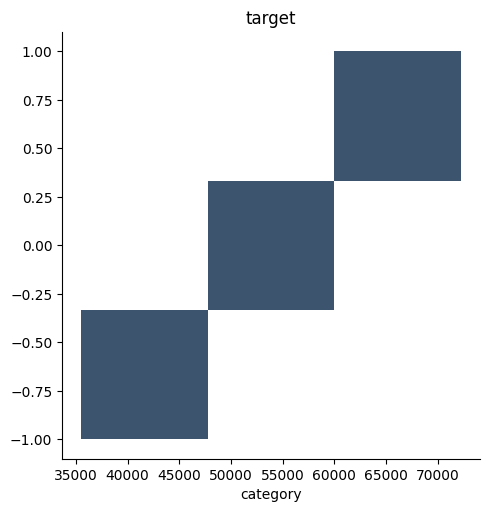

In [21]:
#Target Distribution
import matplotlib.pyplot as plt
import seaborn as sns

locations_vc = df["category"].value_counts()
sns.displot(y=locations_vc.index, x=locations_vc)
plt.title("target")
plt.show()

In [22]:
df.head()

clean_comment  category  word_count
0  when modi promised “minimum government maximum...      -1.0          33
1  talk all the nonsense and continue all the dra...       0.0          13
2  what did just say vote for modi  welcome bjp t...       1.0          22
3  asking his supporters prefix chowkidar their n...       1.0          34
4  answer who among these the most powerful world...       1.0          14

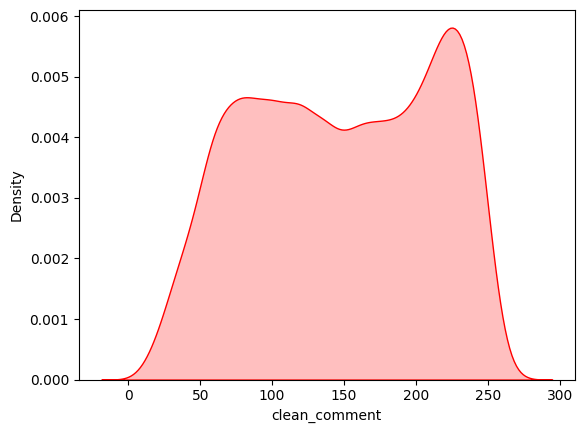

In [23]:
sns.kdeplot(df[df['category'] == -1]['clean_comment'].str.len(), fill=True, color='red');

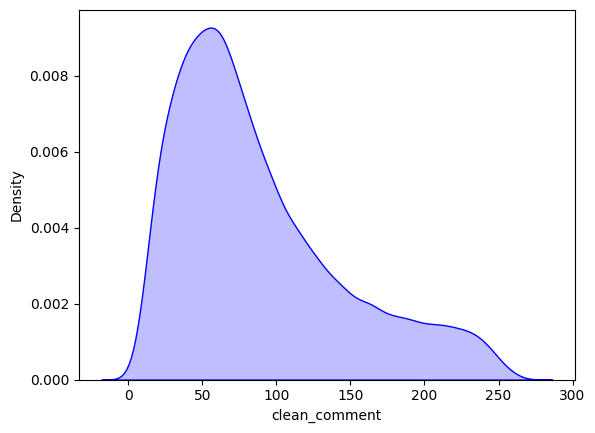

In [24]:
sns.kdeplot(df[df['category'] == 0]['clean_comment'].str.len(), fill=True, color= 'blue');

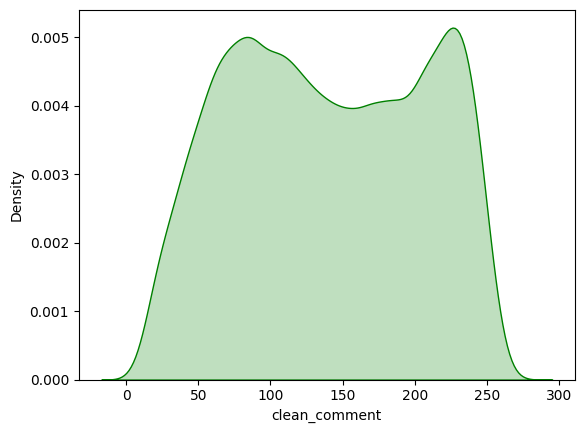

In [25]:
sns.kdeplot(df[df['category'] == 1]['clean_comment'].str.len(), fill=True, color= 'green');

In [26]:
### Target Distribution Heatmaps

In [27]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.density_heatmap(df, x='category')
fig.update_layout(
    title='label density heatmap', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

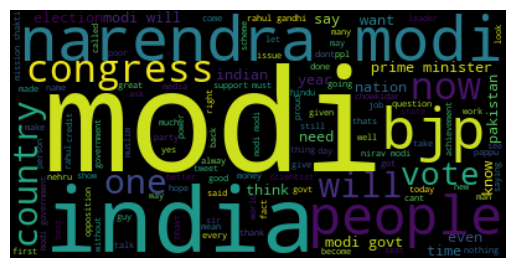

In [28]:
# check common words with the word cloud
common_words=''
for i in df.clean_comment:  
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Preprocessing 

- Data preprocessing is an important step in preparing data for machine learning. It involves making changes to the data so that machines can understand and work with it effectively. The ultimate goal is to help the machine learning model make accurate predictions. To achieve this, we need to ensure that the data is organized and presented in a way that the model can easily understand its different characteristics and patterns. By preprocessing the data, we make it easier for the algorithm to interpret and extract meaningful information from the data's features, leading to more accurate and precise predictions.

In [29]:
### Renaming Target Labels
def rename(val):
    if val == -1:
        return "Negative"
    elif val == 0:
        return "Neutral"
    elif val ==1:
        return "Positive"

In [30]:
df['category'] = df['category'].apply(rename)
#shuffling the data
df = df.sample(frac=1)

In [31]:
#Describe data
df[["clean_comment", "category"]].describe(include='all')

clean_comment  category
count                                              162969    162969
unique                                             162969         3
top     this surgical strikes nepotism modi only merit...  Positive
freq                                                    1     72249

In [32]:
#Abbreveation Creation

abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
     "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
     "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",  "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
      "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
     "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
     "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
     "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
     "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
     "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
     "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

### Generating Word Coud

- Word Cloud is basically the pictorial representation of collective words which will be used for a specific task. in our case it is a removal of stop words. Why we are removing stop words ?? it's becasue these stop words does not mean anything in context to sentences hence it is not necessory when we compose the meanings of the sentences.

In [33]:
#Generating Word Coud

token = list(abbreviations.keys())
comment_words = ''
stopWords = set(STOPWORDS)

for i in range(len(token)):
    token[i] = token[i].lower()
      
    comment_words += " ".join(token)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopWords,
                min_font_size = 10).generate(comment_words)


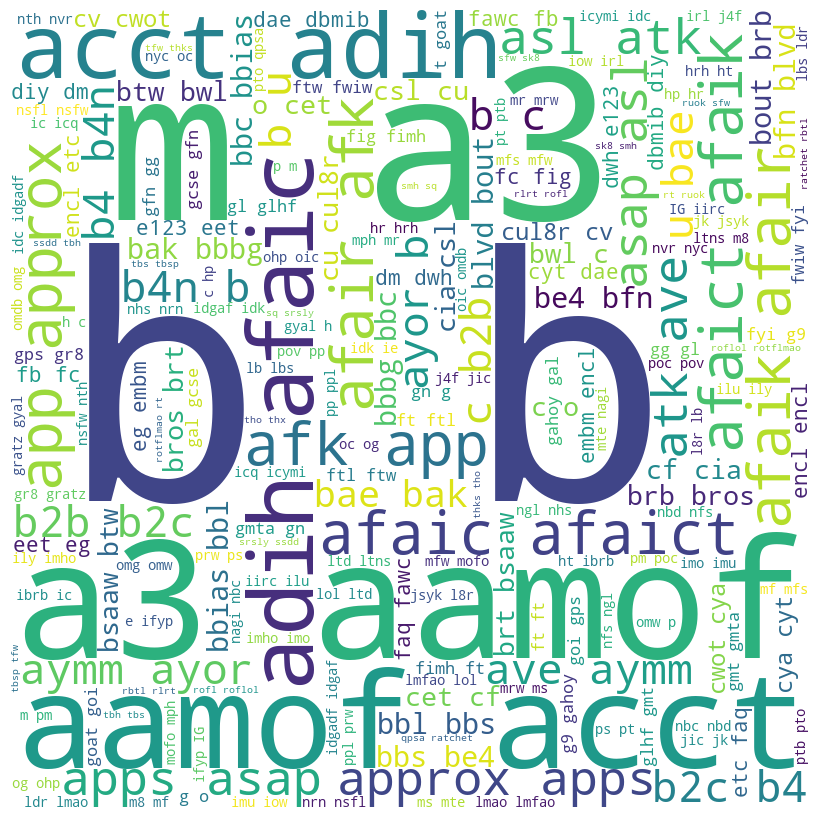

In [34]:
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

- these stop words mean nothing and we  have a picture  showing the words that mean nothing

### Filters 

- Filters remove the words i.e tokens that do no contribute when it comes to classification
- If we fail to remove these words words only noise will be create dthey do no help us in any kindof way

###### Filters remove :

* Removing url
* Removing HTML
* Removing Not_Ascii
* Removing Word Abbreveations
* Removing Mentions
* Removing Numbers
* Removing Emojis : Sad, Smile and Heart
* Removing Elongated Words
* Removing Punctuations
* Lemmatization/ Stemming

In [35]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',str(text))


# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)



# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)


# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

# Factorize elongated words, add ELONG
def remove_elongated_words(text):
    rep = re.compile(r'\b(\S*?)([a-z])\2{2,}\b')
    return rep.sub(r'\1\2 ELONG', text)


# Factorize repeated punctuation, add REPEAT
def remove_repeat_punct(text):
    rep = re.compile(r'([!?.]){2,}')
    return rep.sub(r'\1 REPEAT', text)


# Remove all punctuations
def remove_all_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

# Remove punctuations
def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" 
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    if '...' not in text:
        text = text.replace('..', ' ... ')   
    return text

# Remove all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

def stemming(text):
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text



In [36]:
def clean_text(text):
    
    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)
    
    # Lower text, replace abbreviations
    text = replace_abbrev(text)  
    text = remove_mention(text)
    text = remove_number(text)
    
    # Remove  smileys

    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)
    
    # Remove repeated puntuations / words
    text = remove_elongated_words(text)
    text = remove_repeat_punct(text)
    
    text = remove_all_punct(text)
    text = remove_punct(text)
    text = lemmatization(text)
    text = text.lower()

    return text

In [37]:
df["clean_comment"] = df["clean_comment"].apply(clean_text)

In [38]:
## Calculate Maximum Sequence Length
g=[]
for i in df['clean_comment']:
    g.append(i)

In [39]:
maxl = max([len(s) for s in g])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 297


In [40]:
### Tokenization & Padding
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean_comment'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 95091 unique tokens.


In [41]:
maxl = 3000
X = tokenizer.texts_to_sequences(df['clean_comment'].values)
X = pad_sequences(X, maxlen=maxl)

In [42]:
### Transforming Target Label

In [43]:
Y = pd.get_dummies(df['category'],columns=df["category"]).values

In [44]:
lb = LabelBinarizer().fit(list(set(df['category'].tolist())))

In [45]:
# clean dataset
def cleaning(df, stop_words):
    df['clean_comment'] = df['clean_comment'].apply(lambda x:' '.join(x.lower() for x in x.split()))
    # Replacing the digits/numbers
    df['clean_comment'] = df['clean_comment'].str.replace('^\d+\s|\s\d+\s|\s\d+$', '')
    # Removing stop words
    df['clean_comment'] = df['clean_comment'].apply(lambda x:' '.join(x for x in x.split() if x not in stop_words))
    # Lemmatization
    df['clean_comment'] = df['clean_comment'].apply(lambda x:' '.join([Word(x).lemmatize() for x in x.split()]))
    return df

stop_words = stopwords.words('english')
data_v1 = cleaning(df, stop_words)
data_v1.head(100)

C:\Users\Ajay\AppData\Local\Temp\ipykernel_8900\3151027456.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



clean_comment  category  \
20832   surgical strike nepotism modi merit get ticket...   Neutral   
17502   nda agenda parliamentarian upa time big differ...  Positive   
15559   even think anyhow know strategy tejaswi sure a...  Positive   
30121   finance minister tell zee news editorinchief p...  Positive   
11049   akhilesh yadav hurl chaiwala chowkidar attack ...  Positive   
...                                                   ...       ...   
161623  feel trio modi mamta raga maza aajayega debate...   Neutral   
155726  think bjp number mean unstable government ally...  Positive   
41407   every indian please support time modi governme...  Positive   
23019                case india phir bar bar modi sarkaar   Neutral   
63498                life change number number modis rule   Neutral   

        word_count  
20832           28  
17502           32  
15559           16  
30121           12  
11049           12  
...            ...  
161623          27  
155726          38  
41407           16  
23019           12  
63498           10  

[100 rows x 3 columns]

In [46]:
# Encoded the target column
lb=LabelEncoder()
data_v1['category'] = lb.fit_transform(data_v1['category'])
data_v1.head()

clean_comment  category  word_count
20832  surgical strike nepotism modi merit get ticket...         1          28
17502  nda agenda parliamentarian upa time big differ...         2          32
15559  even think anyhow know strategy tejaswi sure a...         2          16
30121  finance minister tell zee news editorinchief p...         2          12
11049  akhilesh yadav hurl chaiwala chowkidar attack ...         2          12

### Tokenizing the text

-  You need to first convert the sentences into words and then convert them to numbers, this process is called tokenization. Keras library already provides an implementation for tokenizers where you just need to pass the text and the maximum number of tokens you want your model to generate.

In [47]:
# tokenize input text
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data_v1['clean_comment'].values)
X = tokenizer.texts_to_sequences(data_v1['clean_comment'].values)
X = pad_sequences(X)

- You might also be aware that different text may have different lengths in the dataset, which is not ideal while working with LSTM models. We need to make inputs of the same length, for which we are using pad_sequence() functions that pads the input with 0's to make them all of the same length.

- Whatever preprocessing or data cleaning you apply to text during the training phase needs to be replicated for testing and production as well. For this reason, you need to save this tokenizer object that converts your input text to tokens for model input.

In [48]:
# saving tokenizer
with open('tokenizer_LSTM.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
# Splitting the data into training and testing
y = pd.get_dummies(data_v1['category'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

#### We will use LSTM with Keras for building the predictive model.

In [50]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.metrics import Precision, Recall

In [51]:
# create model architecture
model = Sequential()

#Add embedding layer
model.add(Embedding(500, 120, input_length = X.shape[1]))

#Randomly set input values to 0 to prevent overfitting
model.add(SpatialDropout1D(0.4))

#Add a RNN (LSTM)
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))

#Add a Dense Layer
model.add(Dense(3,activation='softmax'))

#Compile the Model 
model.compile(loss = 'categorical_crossentropy', 
              optimizer='adam', 
              metrics = ['accuracy', Precision(), Recall()])



In [52]:
#Print the summary of the Model 
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 120)           60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 35, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 3)                 531       
                                                                 
Total params: 269,619
Trainable params: 269,619
Non-trainable params: 0
_________________________________________________________________
None


#### Evaluate the Model 

In [53]:
# run model 
batch_size=32
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    epochs = 5, batch_size = batch_size, 
                    verbose = 'auto')

Epoch 1/5
3565/3565 [==============================] - 762s 211ms/step - loss: 0.6973 - accuracy: 0.7147 - precision: 0.7642 - recall: 0.6495 - val_loss: 0.6692 - val_accuracy: 0.7304 - val_precision: 0.7732 - val_recall: 0.6788
Epoch 2/5
3565/3565 [==============================] - 772s 216ms/step - loss: 0.6617 - accuracy: 0.7311 - precision: 0.7758 - recall: 0.6779 - val_loss: 0.6623 - val_accuracy: 0.7300 - val_precision: 0.7670 - val_recall: 0.6869
Epoch 3/5
3565/3565 [==============================] - 843s 236ms/step - loss: 0.6549 - accuracy: 0.7334 - precision: 0.7794 - recall: 0.6771 - val_loss: 0.6599 - val_accuracy: 0.7335 - val_precision: 0.7723 - val_recall: 0.6857
Epoch 4/5
3565/3565 [==============================] - 758s 213ms/step - loss: 0.6488 - accuracy: 0.7357 - precision: 0.7823 - recall: 0.6799 - val_loss: 0.6569 - val_accuracy: 0.7341 - val_precision: 0.7792 - val_recall: 0.6778
Epoch 5/5
3565/3565 [==============================] - 743s 208ms/step - loss: 0.643

In [54]:
# Analyze the model using the test data.
model.evaluate(X_test,y_test)

1528/1528 [==============================] - 46s 30ms/step - loss: 0.6599 - accuracy: 0.7331 - precision: 0.7703 - recall: 0.6898


[0.6598926186561584,
 0.7330592274665833,
 0.7702761292457581,
 0.6897997856140137]

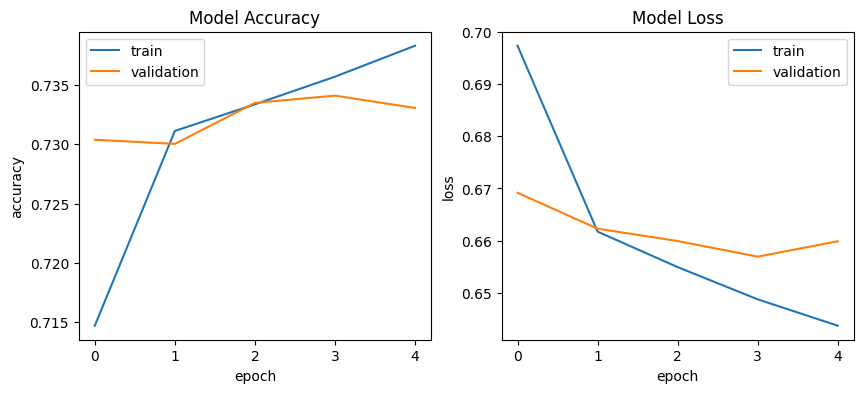

In [55]:
def plot_training_hist(history):
    '''Plot history for accuracy and loss'''
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

1528/1528 [==============================] - 45s 29ms/step


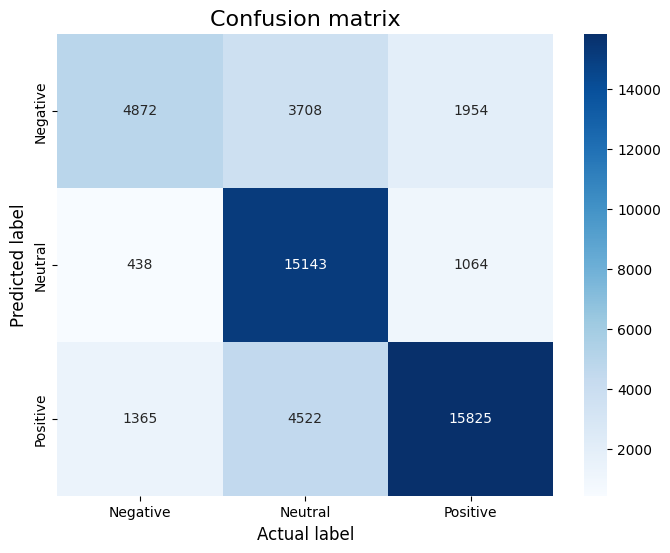

In [56]:
# check the model's performance on testing data
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns 

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use the model to do the prediction
    y_pred = model.predict(X_test)
    # compute the confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [64]:
import tensorflow as tf

In [67]:
# Save the model in SavedModel format
tf.saved_model.save(model, 'model_LSTM')

INFO:tensorflow:Assets written to: model_LSTM\assets
